## Import Raw Data

In [1]:
%run Joshua.ipynb

# the above notebook read two pd.dataframe from Joshua,
# 1. data_all
# 2. data_10
# both of them only contains the following columns: 
# columns = ['cookieid', 'visitid', 'visitdatetime', 'pagetype', 
# 'pagecategory', 'pagename', 'ordernumber', 'devicetype']

## IT TAKES ABOUT 2 MINUTES TO RUN THIS NOTEBOOK.

CPU times: user 948 ms, sys: 68 ms, total: 1.02 s
Wall time: 5.56 s
CPU times: user 3.51 s, sys: 830 ms, total: 4.34 s
Wall time: 10.8 s
CPU times: user 23.9 s, sys: 5.92 s, total: 29.8 s
Wall time: 1min 4s
CPU times: user 15.5 s, sys: 1.72 s, total: 17.2 s
Wall time: 16.3 s


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import random

In [3]:
# view the raw data

len(data_all)

42730149

In [4]:
%%time

# sort the dataframe
sort_df = data_all.sort_values(['cookieid', 'visitid', 'visitdatetime'])
sort_df.head(10)

CPU times: user 1min 13s, sys: 2.72 s, total: 1min 15s
Wall time: 1min 15s


,cookieid,visitid,visitdatetime,pagetype,pagecategory,pagename,ordernumber,devicetype,visitday
2412566,00,001,2022-12-10 00:14:23,None,ensemble detail page,pdp:Chic Home Ora Comforter Set,None,Desktop,10
397999,00,001,2022-12-10 00:48:45,None,search,search:results,None,Mobile,10
4358017,00,001,2022-12-10 00:52:32,None,search,search:results,None,Mobile,10
5547051,00,001,2022-12-10 00:54:07,None,search,search:results,None,Tablet,10
5608823,00,001,2022-12-10 00:55:22,None,search,search:results,None,Desktop,10
1749974,00,001,2022-12-10 00:58:49,None,ensemble detail page,pdp:Spirit Linen Home Sleep Wellness 6-Pc. She...,None,Tablet,10
2947480,00,001,2022-12-10 01:12:07,None,ensemble detail page,pdp:Ultra-Soft Modern Microfiber Sheet Set and...,None,Mobile,10
1378220,00,001,2022-12-10 01:27:46,None,ensemble detail page,pdp:Madison Park Infinity Comforter Set Collec...,None,Mobile,10
1757096,00,001,2022-12-10 01:32:21,None,ensemble detail page,pdp:Hanes TAGLESS Nano-T Men's Long-Sleeve Tee,None,Tablet,10
655320,00,001,2022-12-10 01:32:41,None,ensemble detail page,pdp:Easy Street Women's Kay Open Back Comfort ...,None,Tablet,10


In [5]:
%%time

# get collapse time between clicks. in seconds.
sort_df['timediff'] = sort_df['visitdatetime'].diff().dt.total_seconds()
sort_df['timediff'] = sort_df['timediff'].fillna(0)

# negative number does not make sense, and occurs only when visitid change. replace with 0
sort_df['timediff'][sort_df['timediff'] < 0] = 0

CPU times: user 840 ms, sys: 414 ms, total: 1.25 s
Wall time: 1.11 s


<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
sort_df.head(10)

,cookieid,visitid,visitdatetime,pagetype,pagecategory,pagename,ordernumber,devicetype,visitday,timediff
2412566,00,001,2022-12-10 00:14:23,None,ensemble detail page,pdp:Chic Home Ora Comforter Set,None,Desktop,10,0.0
397999,00,001,2022-12-10 00:48:45,None,search,search:results,None,Mobile,10,2062.0
4358017,00,001,2022-12-10 00:52:32,None,search,search:results,None,Mobile,10,227.0
5547051,00,001,2022-12-10 00:54:07,None,search,search:results,None,Tablet,10,95.0
5608823,00,001,2022-12-10 00:55:22,None,search,search:results,None,Desktop,10,75.0
1749974,00,001,2022-12-10 00:58:49,None,ensemble detail page,pdp:Spirit Linen Home Sleep Wellness 6-Pc. She...,None,Tablet,10,207.0
2947480,00,001,2022-12-10 01:12:07,None,ensemble detail page,pdp:Ultra-Soft Modern Microfiber Sheet Set and...,None,Mobile,10,798.0
1378220,00,001,2022-12-10 01:27:46,None,ensemble detail page,pdp:Madison Park Infinity Comforter Set Collec...,None,Mobile,10,939.0
1757096,00,001,2022-12-10 01:32:21,None,ensemble detail page,pdp:Hanes TAGLESS Nano-T Men's Long-Sleeve Tee,None,Tablet,10,275.0
655320,00,001,2022-12-10 01:32:41,None,ensemble detail page,pdp:Easy Street Women's Kay Open Back Comfort ...,None,Tablet,10,20.0


In [7]:
%%time

# calculate the mean collapse time between clicks.
browse_interval = sort_df.groupby(['visitid'])['timediff'].mean()
browse_interval


CPU times: user 9.39 s, sys: 364 ms, total: 9.75 s
Wall time: 9.75 s


visitid
001                                          262.968178
0010                                        3489.843023
00100                                      96053.600000
00101                                      58920.000000
00102                                      74280.833333
                                              ...      
99997363407775132790292379433452812751         9.666667
99998319783911559758692653866775905231         0.000000
99999087067885636914464571239461031391    488050.000000
99999155003421544234572785263257688231         0.500000
99999763532480511365117907654043064165      9612.500000
Name: timediff, Length: 2041286, dtype: float64

In [8]:
browse_interval = list(browse_interval)

In [9]:
%%time

# store the pagename and pagecategory history of a visitid in a list,
# store the length of that unique list in another column.

page_history = pd.DataFrame(sort_df.groupby(['visitid'])['pagename'].unique())
page_history = page_history.reset_index()
page_history['page_count'] = page_history.apply(lambda x: len(x.pagename), axis=1)

category_history = pd.DataFrame(sort_df.groupby(['visitid'])['pagecategory'].unique())
category_history = category_history.reset_index()
#
category_history['category_count'] = category_history.apply(lambda x: len(x.pagecategory), axis=1)

print(len(category_history))
category_history.head(10)

2041286
CPU times: user 7min 39s, sys: 4.03 s, total: 7min 43s
Wall time: 7min 43s


,visitid,pagecategory,category_count
0,001,"[ensemble detail page, search, sub category, c...",16
1,0010,"[search, ensemble detail page, None, sub categ...",10
2,00100,"[index, ensemble detail page, sub category, se...",4
3,00101,"[search, ensemble detail page, cart]",3
4,00102,"[None, ensemble detail page, sub category]",3
5,00103,"[ensemble detail page, search]",2
6,00104,"[search, ensemble detail page, mobile index]",3
7,00105,"[ensemble detail page, search, sub category]",3
8,00106,[ensemble detail page],1
9,00107,"[search, ensemble detail page]",2


In [10]:
%%time

# merge the two dataframes in previous cell into one.
history_df = page_history
history_df[['pagecategory', 'category_count']] = category_history[['pagecategory', 'category_count']]

purchaseID_list = data_all[data_all['ordernumber'].notnull()]['visitid'].unique().tolist()
history_df['made_purchase'] = np.repeat(False, len(history_df))
history_df.loc[history_df['visitid'].isin(purchaseID_list), ['made_purchase']] = True

history_df.head(10)

CPU times: user 1.62 s, sys: 76.1 ms, total: 1.7 s
Wall time: 1.7 s


,visitid,pagename,page_count,pagecategory,category_count,made_purchase
0,001,"[pdp:Chic Home Ora Comforter Set, search:resul...",671,"[ensemble detail page, search, sub category, c...",16,False
1,0010,"[search:results, pdp:10K 1/2 ct tw Diamond Bri...",100,"[search, ensemble detail page, None, sub categ...",10,False
2,00100,"[index, pdp:Carhartt Men's Rugged Flex Rigby F...",5,"[index, ensemble detail page, sub category, se...",4,False
3,00101,"[search:results, pdp:Caden 30-Pc. Bedroom Supe...",5,"[search, ensemble detail page, cart]",3,False
4,00102,"[search:results, pdp:Geneva Home Fashion Textu...",5,"[None, ensemble detail page, sub category]",3,False
5,00103,"[pdp:Journee Collection Women's Rebecca Boot, ...",3,"[ensemble detail page, search]",2,False
6,00104,"[search:results, pdp:Beautyrest Heated Plush B...",6,"[search, ensemble detail page, mobile index]",3,False
7,00105,[pdp:Ariat Men's Sport Patriot Western Boot Co...,7,"[ensemble detail page, search, sub category]",3,False
8,00106,[pdp:Ariat Men's Turbo Chelsea H2O Waterproof ...,2,[ensemble detail page],1,False
9,00107,"[search:results, pdp:Kathy Ireland Essentials ...",3,"[search, ensemble detail page]",2,False


In [11]:
# add the mean collapse time we calculated at the beginning.

history_df['avg_browse'] = browse_interval
history_df

,visitid,pagename,page_count,pagecategory,category_count,made_purchase,avg_browse
0,001,"[pdp:Chic Home Ora Comforter Set, search:resul...",671,"[ensemble detail page, search, sub category, c...",16,False,262.968178
1,0010,"[search:results, pdp:10K 1/2 ct tw Diamond Bri...",100,"[search, ensemble detail page, None, sub categ...",10,False,3489.843023
2,00100,"[index, pdp:Carhartt Men's Rugged Flex Rigby F...",5,"[index, ensemble detail page, sub category, se...",4,False,96053.600000
3,00101,"[search:results, pdp:Caden 30-Pc. Bedroom Supe...",5,"[search, ensemble detail page, cart]",3,False,58920.000000
4,00102,"[search:results, pdp:Geneva Home Fashion Textu...",5,"[None, ensemble detail page, sub category]",3,False,74280.833333
...,...,...,...,...,...,...,...
2041281,99997363407775132790292379433452812751,[pdp:Ariat Men's WorkHog Pull-On Waterproof Wo...,1,[product detail page],1,False,9.666667
2041282,99998319783911559758692653866775905231,[pdp:Pilot Automotive Seat Covers - Camo Mesh ...,1,[product detail page],1,False,0.000000
2041283,99999087067885636914464571239461031391,[search:results],1,[None],1,False,488050.000000
2041284,99999155003421544234572785263257688231,[pdp:Timberland Women's Courmayeur Valley Chel...,1,[product detail page],1,False,0.500000


(array([1.832768e+06, 1.172400e+05, 4.852300e+04, 1.976100e+04,
        1.076900e+04, 5.127000e+03, 3.065000e+03, 2.403000e+03,
        1.273000e+03, 3.570000e+02]),
 array([     0. ,  60304.3, 120608.6, 180912.9, 241217.2, 301521.5,
        361825.8, 422130.1, 482434.4, 542738.7, 603043. ]),
 <BarContainer object of 10 artists>)

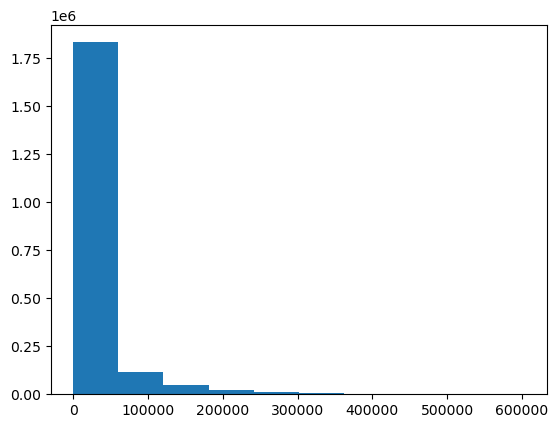

In [12]:
# note the value of average browse time is highly skewed to the right.
# Take log and normalize.

plt.hist(history_df['avg_browse'])

In [13]:
from sklearn.preprocessing import StandardScaler

# add 0.1 to avoid log(0)
history_df['avg_browse'] = np.log(history_df['avg_browse'] + 0.01)

# standard scale it.
scaler = StandardScaler()
scaler.fit_transform(history_df[['avg_browse']])

history_df.head(10)

,visitid,pagename,page_count,pagecategory,category_count,made_purchase,avg_browse
0,001,"[pdp:Chic Home Ora Comforter Set, search:resul...",671,"[ensemble detail page, search, sub category, c...",16,False,5.572071
1,0010,"[search:results, pdp:10K 1/2 ct tw Diamond Bri...",100,"[search, ensemble detail page, None, sub categ...",10,False,8.157615
2,00100,"[index, pdp:Carhartt Men's Rugged Flex Rigby F...",5,"[index, ensemble detail page, sub category, se...",4,False,11.472662
3,00101,"[search:results, pdp:Caden 30-Pc. Bedroom Supe...",5,"[search, ensemble detail page, cart]",3,False,10.983936
4,00102,"[search:results, pdp:Geneva Home Fashion Textu...",5,"[None, ensemble detail page, sub category]",3,False,11.215608
5,00103,"[pdp:Journee Collection Women's Rebecca Boot, ...",3,"[ensemble detail page, search]",2,False,11.858509
6,00104,"[search:results, pdp:Beautyrest Heated Plush B...",6,"[search, ensemble detail page, mobile index]",3,False,10.189295
7,00105,[pdp:Ariat Men's Sport Patriot Western Boot Co...,7,"[ensemble detail page, search, sub category]",3,False,10.421037
8,00106,[pdp:Ariat Men's Turbo Chelsea H2O Waterproof ...,2,[ensemble detail page],1,False,11.976798
9,00107,"[search:results, pdp:Kathy Ireland Essentials ...",3,"[search, ensemble detail page]",2,False,11.480322


array([[<AxesSubplot:title={'center':'avg_browse'}>]], dtype=object)

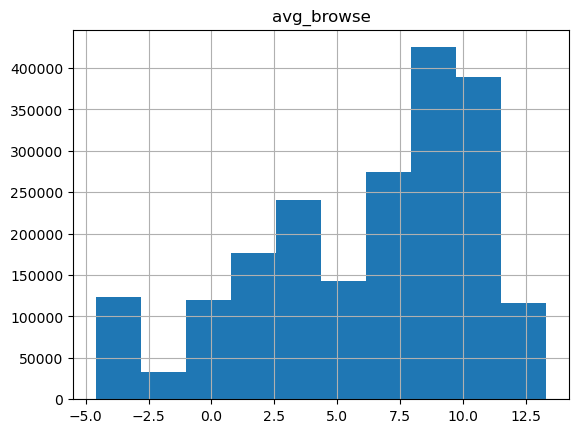

In [14]:
history_df[['avg_browse']].hist()

In [15]:
# visitid less than 4 digits probably means insider testing employee
history_df[240:250]

,visitid,pagename,page_count,pagecategory,category_count,made_purchase,avg_browse
240,0093,[pdp:New Balance Women's Fresh Foam X Tempo v2...,5,"[ensemble detail page, index]",2,False,11.323695
241,0094,"[mobile index, pdp:Lush Decor Reyna Window Cur...",4,"[mobile index, ensemble detail page, search]",3,False,11.637742
242,0095,[pdp:Geneva Home Fashion Textured Robe & Slipp...,7,"[ensemble detail page, search]",2,False,10.598866
243,0096,[pdp:Victory Outfitters Men's Sherpa Fleece-Li...,4,"[ensemble detail page, sub category, search]",3,False,11.332812
244,0097,[pdp:Spirit Linen Home Cotton Flannel Sheet Se...,4,"[ensemble detail page, search, product detail ...",3,False,9.970156
245,0098,"[search:results, pdp:Superior Storden Quilted ...",6,"[None, ensemble detail page, sub category, sea...",4,False,11.107577
246,0099,"[pdp:Marilyn Monroe Women's 4-Pack Cozy Socks,...",4,"[ensemble detail page, index, search]",3,False,11.390783
247,100003554424771505478041597680256771771,[index],1,"[None, index]",2,False,1.226712
248,100003759420947093538048685539306550821,[pdp:adidas Men's Entrap Basketball Shoe],1,[product detail page],1,False,9.660811
249,100003896751778472717506120187804385992,[index],1,"[index, None]",2,False,10.464183


In [16]:
# to verify, no purchase has been made by user with less than 4 digits of visitid.
sum(history_df['made_purchase'][0:247])

0

In [17]:
# remove insider employee.
history_df = history_df.tail(-247)
history_df = history_df.reset_index(drop = True)
history_df.head(20)

,visitid,pagename,page_count,pagecategory,category_count,made_purchase,avg_browse
0,100003554424771505478041597680256771771,[index],1,"[None, index]",2,False,1.226712
1,100003759420947093538048685539306550821,[pdp:adidas Men's Entrap Basketball Shoe],1,[product detail page],1,False,9.660811
2,100003896751778472717506120187804385992,[index],1,"[index, None]",2,False,10.464183
3,10000455855685103529447225381452135531,[pdp:Michael Kors Men's Slim Runway Black Stai...,4,"[product detail page, None, ensemble detail page]",3,False,3.915075
4,10000455855685103529447225381452135532,[pdp:Microsoft Xbox Wireless Controller â€“ Bl...,1,[product detail page],1,False,12.154743
5,100005621477749447683955130948084704081,"[index, Featured Shops:Gift Finder, search:res...",4,"[index, None, category, search, product detail...",5,False,3.173251
6,100005981336351345185339298655551670862,[index],1,[index],1,False,11.379661
7,100005981336351345185339298655551670863,[index],1,"[index, None]",2,False,9.591536
8,100005981336351345185339298655551670864,[index],1,"[index, None]",2,False,10.482724
9,100005992838523720725702387873306416491,"[index, search:results, Toys]",3,"[index, None, site section]",3,False,8.528585


In [18]:
# see the proportion of visits that turn into a purchase
np.mean(history_df['made_purchase'])

0.05484657569012645

In [19]:
len(history_df)

2041039

In [20]:
random.seed(99)
# use down sampling to solve the imbalance
# it is also faster to run.

# keep all the visitid turn into purchase
sample_yes = history_df[history_df['made_purchase']]

# only keep 15% of the visits that do not purchase
sample_no = history_df[history_df['made_purchase'] == False].sample(frac = 0.06)

history_sample = pd.concat([sample_yes, sample_no],  axis = 0)

In [21]:
# sort the data by visitid.

history_sample = history_sample.sort_values(['visitid'])
history_sample = history_sample.reset_index(drop = True)

# total of 401k oberservations
history_sample

,visitid,pagename,page_count,pagecategory,category_count,made_purchase,avg_browse
0,10000455855685103529447225381452135531,[pdp:Michael Kors Men's Slim Runway Black Stai...,4,"[product detail page, None, ensemble detail page]",3,False,3.915075
1,100007258779446896919699036238510106391,[pdp:RESPAWN 110 Pro Racing Style Gaming Chair...,1,[product detail page],1,False,2.352327
2,1000090341089758676794771314248363853732,[mobile index],1,"[None, mobile index]",2,False,10.868696
3,1000094703053497855012889633412932961,[search:results],1,"[site section, None, category]",3,False,6.776311
4,1000108257559953773562411289844339462981,"[cart, Clothing:Accessories, pdp:Carhartt Men'...",8,"[cart, None, category, product detail page, en...",7,True,2.766948
...,...,...,...,...,...,...,...
227685,99981909984864820644946664237114942271,"[Home:Pet Supplies:Dogs, cart, search:results,...",15,"[sub category, cart, search, product detail pa...",9,True,7.091757
227686,999824457406219042345569481024861893330,[index],1,"[index, None]",2,False,8.596253
227687,99982635293745498979448352461233351991,[index],1,[index],1,False,-0.390576
227688,99989189022307066135307405452681929782,[pdp:Color Club Holy Holo Holographic Dip-Gel ...,1,[product detail page],1,False,10.267158


In [22]:
np.median(history_df['category_count'])

2.0

In [23]:
# note the data is much more balanced now.
np.mean(history_sample['made_purchase'])

## Under-sampling
 #: keep all of the rare data and down sample the abundant data.

0.4916509288945496

In [24]:
%%time

# only keep FIRST TWENTY visited category.

split = pd.DataFrame(history_sample['pagecategory'].to_list())
X = split.iloc[:,0:10]
Y = history_sample['made_purchase']

X

CPU times: user 429 ms, sys: 19.9 ms, total: 449 ms
Wall time: 448 ms


,0,1,2,3,4,5,6,7,8,9
0,product detail page,None,ensemble detail page,None,None,None,None,None,None,None
1,product detail page,None,None,None,None,None,None,None,None,None
2,None,mobile index,None,None,None,None,None,None,None,None
3,site section,None,category,None,None,None,None,None,None,None
4,cart,None,category,product detail page,ensemble detail page,Cart_Interstitial,checkout,None,None,None
...,...,...,...,...,...,...,...,...,...,...
227685,sub category,cart,search,product detail page,None,Cart_Interstitial,category,ensemble detail page,checkout,None
227686,index,None,None,None,None,None,None,None,None,None
227687,index,None,None,None,None,None,None,None,None,None
227688,product detail page,None,None,None,None,None,None,None,None,None


In [25]:
X.replace(to_replace=[None], value='Nothing', inplace=True)
X

/tmp/ipykernel_30715/3717594990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(to_replace=[None], value='Nothing', inplace=True)


,0,1,2,3,4,5,6,7,8,9
0,product detail page,Nothing,ensemble detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
1,product detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
2,Nothing,mobile index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
3,site section,Nothing,category,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
4,cart,Nothing,category,product detail page,ensemble detail page,Cart_Interstitial,checkout,Nothing,Nothing,Nothing
...,...,...,...,...,...,...,...,...,...,...
227685,sub category,cart,search,product detail page,Nothing,Cart_Interstitial,category,ensemble detail page,checkout,Nothing
227686,index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
227687,index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing
227688,product detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing


In [26]:
pd.Series(X.to_numpy().ravel()).value_counts()

Nothing                  1303748
product detail page       149277
cart                      127009
checkout                  110589
search                    110529
Cart_Interstitial         106380
index                      92785
mobile index               66682
category                   59098
site section               45129
sub category               37895
ensemble detail page       35477
mobile shopping            19736
sub category 2              6172
my account                  5405
error                        489
Landing Page                 188
Product Not Found            115
sub category 3                81
blog:page type:page           71
blog:page type:post           38
Customer Service               5
preview                        1
blog:page type:search          1
dtype: int64

In [27]:
top15 = pd.Series(X.to_numpy().ravel()).value_counts()[0:15]
top15 = top15.index.values.tolist()
top15

['Nothing',
 'product detail page',
 'cart',
 'checkout',
 'search',
 'Cart_Interstitial',
 'index',
 'mobile index',
 'category',
 'site section',
 'sub category',
 'ensemble detail page',
 'mobile shopping',
 'sub category 2',
 'my account']

In [28]:
%%time

## lambda is inefficient, it evaluate 10 * 15 * n. takes around 12 MINUTES

for feature in top15:
    X[feature] =  X.apply(lambda row: feature in row[0:10].values, axis = 1)
X

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 4min 53s, sys: 1.84 s, total: 4min 54s
Wall time: 4min 55s


,0,1,2,3,4,5,6,7,8,9,...,Cart_Interstitial,index,mobile index,category,site section,sub category,ensemble detail page,mobile shopping,sub category 2,my account
0,product detail page,Nothing,ensemble detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,False,False,False,False,False,True,False,False,False
1,product detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,False,False,False,False,False,False,False,False,False
2,Nothing,mobile index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,False,True,False,False,False,False,False,False,False
3,site section,Nothing,category,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,False,False,True,True,False,False,False,False,False
4,cart,Nothing,category,product detail page,ensemble detail page,Cart_Interstitial,checkout,Nothing,Nothing,Nothing,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227685,sub category,cart,search,product detail page,Nothing,Cart_Interstitial,category,ensemble detail page,checkout,Nothing,...,True,False,False,True,False,True,True,False,False,False
227686,index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,True,False,False,False,False,False,False,False,False
227687,index,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,True,False,False,False,False,False,False,False,False
227688,product detail page,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X.columns

Index([                     0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,              'Nothing',  'product detail page',
                       'cart',             'checkout',               'search',
          'Cart_Interstitial',                'index',         'mobile index',
                   'category',         'site section',         'sub category',
       'ensemble detail page',      'mobile shopping',       'sub category 2',
                 'my account'],
      dtype='object')

In [30]:
X_new = X.loc[:,'Nothing':'sub category 2']

In [31]:
X_new = pd.concat([X_new, history_sample[['page_count', 'category_count', 'avg_browse']]], axis = 1)
X_new

,Nothing,product detail page,cart,checkout,search,Cart_Interstitial,index,mobile index,category,site section,sub category,ensemble detail page,mobile shopping,sub category 2,page_count,category_count,avg_browse
0,True,True,False,False,False,False,False,False,False,False,False,True,False,False,4,3,3.915075
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,1,1,2.352327
2,True,False,False,False,False,False,False,True,False,False,False,False,False,False,1,2,10.868696
3,True,False,False,False,False,False,False,False,True,True,False,False,False,False,1,3,6.776311
4,True,True,True,True,False,True,False,False,True,False,False,True,False,False,8,7,2.766948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227685,True,True,True,True,True,True,False,False,True,False,True,True,False,False,15,9,7.091757
227686,True,False,False,False,False,False,True,False,False,False,False,False,False,False,1,2,8.596253
227687,True,False,False,False,False,False,True,False,False,False,False,False,False,False,1,1,-0.390576
227688,True,True,False,False,False,False,False,False,False,False,False,False,False,False,1,1,10.267158


In [32]:
XY = pd.concat([X_new, Y], axis = 1)
XY.head(10)

,Nothing,product detail page,cart,checkout,search,Cart_Interstitial,index,mobile index,category,site section,sub category,ensemble detail page,mobile shopping,sub category 2,page_count,category_count,avg_browse,made_purchase
0,True,True,False,False,False,False,False,False,False,False,False,True,False,False,4,3,3.915075,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,1,1,2.352327,False
2,True,False,False,False,False,False,False,True,False,False,False,False,False,False,1,2,10.868696,False
3,True,False,False,False,False,False,False,False,True,True,False,False,False,False,1,3,6.776311,False
4,True,True,True,True,False,True,False,False,True,False,False,True,False,False,8,7,2.766948,True
5,True,True,True,True,True,True,False,True,True,False,False,False,True,False,12,9,4.905285,True
6,True,True,True,True,True,True,False,False,False,False,False,False,False,False,9,6,5.636683,True
7,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,2,10.320536,False
8,True,False,False,False,True,False,True,False,False,False,False,False,False,False,3,4,3.545193,False
9,True,True,True,True,False,True,True,False,True,False,True,True,False,True,18,10,5.223267,True


In [33]:
corr_matrix = XY.corr().abs()

high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

high_corr_var

[('cart', 'checkout'),
 ('cart', 'made_purchase'),
 ('checkout', 'made_purchase'),
 ('Cart_Interstitial', 'category_count')]

In [34]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [35]:
# pip install xgboost

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9793432591096081

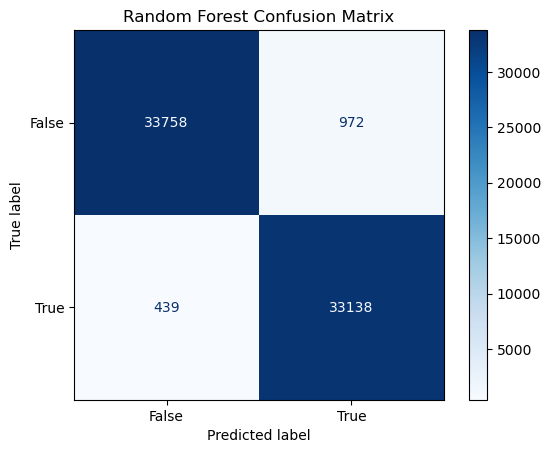

In [37]:
y_preds = rf_model.predict(X_test)
confusion_matrix(y_test, y_preds)

cm = confusion_matrix(y_test, y_preds, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot(cmap=plt.cm.Blues) 
disp.ax_.set_title("Random Forest Confusion Matrix")
plt.show()

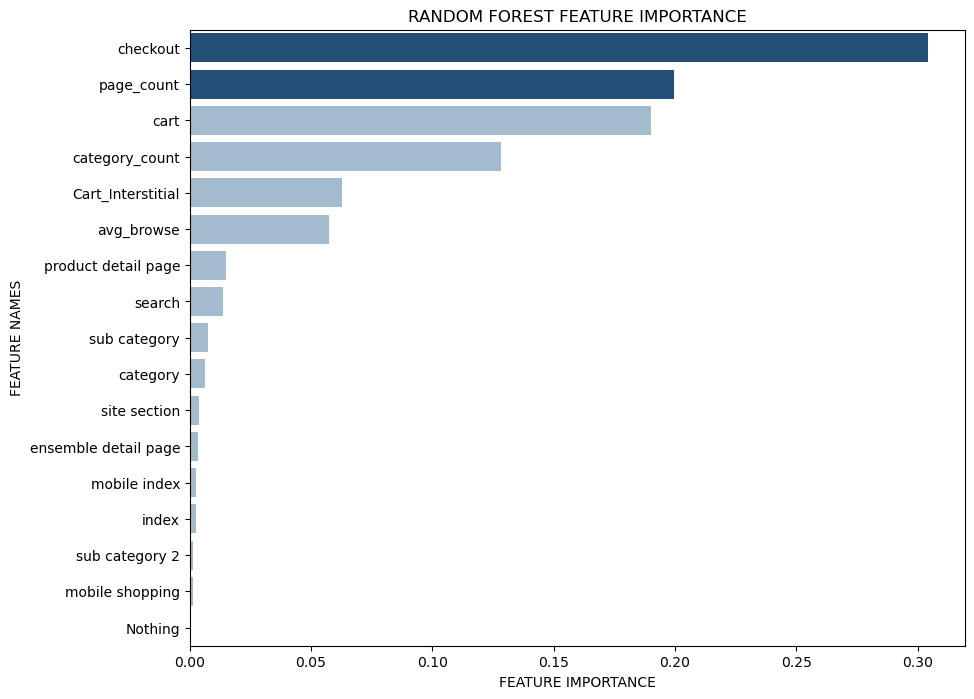

In [38]:
import seaborn as sns

def plot_feature_importance(importance, names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    colors = ['#155084' if (idx <= 1) else '#9dbcd4' for idx, x in enumerate(feature_importance)]
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette = colors)
    
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    #Add chart labels
    if model_type.upper() == "RANDOM FOREST":
        plt.title(model_type + ' FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')
        
    if model_type.upper() == "XGBOOST":
        plt.title(model_type + ' FEATURE IMPORTANCE')
        plt.xlabel('F1 Score')
        plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf_model.feature_importances_, X_new.columns, 'RANDOM FOREST')

In [39]:
Z_train, Z_test = X_train.drop(['checkout'], axis = 1), X_test.drop(['checkout'], axis = 1)
rf_model = RandomForestClassifier()
rf_model.fit(Z_train, y_train)
rf_model.score(Z_test, y_test)

0.9656696971027859

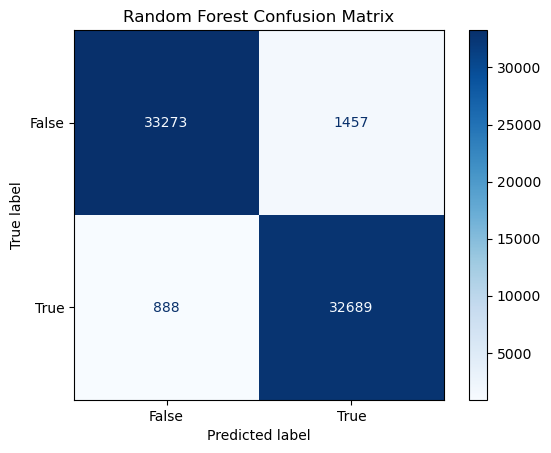

In [40]:
preds = rf_model.predict(Z_test)
confusion_matrix(y_test, preds)

cm = confusion_matrix(y_test, preds, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues) 
disp.ax_.set_title("Random Forest Confusion Matrix")
plt.show()

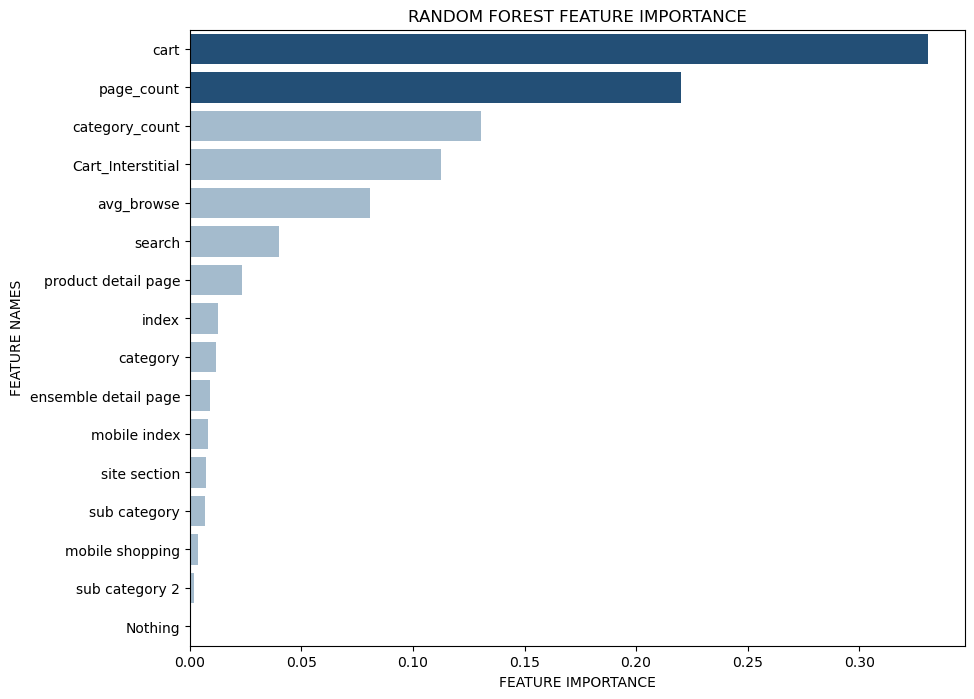

In [41]:
plot_feature_importance(rf_model.feature_importances_, Z_train.columns, 'RANDOM FOREST')

In [42]:
Q_train, Q_test = Z_train.drop(['cart'], axis = 1), Z_test.drop(['cart'], axis = 1)
rf_model = RandomForestClassifier()
rf_model.fit(Q_train, y_train)
rf_model.score(Q_test, y_test)

0.9654793798585797

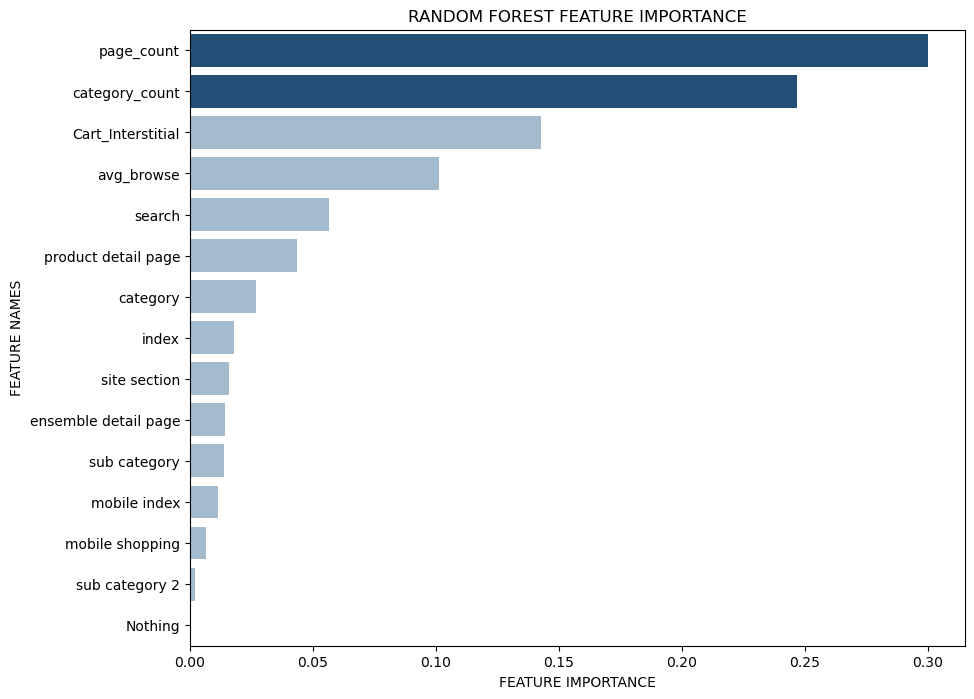

In [43]:
plot_feature_importance(rf_model.feature_importances_, Q_train.columns, 'RANDOM FOREST')

In [44]:
# Training after removing trivial variables

P_train, P_test = Q_train.drop(['page_count'], axis = 1), Q_test.drop(['page_count'], axis = 1)
rf_model = RandomForestClassifier()
rf_model.fit(P_train, y_train)
rf_model.score(P_test, y_test)

0.9376784224164434

In [45]:
P_train.head(10)

,Nothing,product detail page,search,Cart_Interstitial,index,mobile index,category,site section,sub category,ensemble detail page,mobile shopping,sub category 2,category_count,avg_browse
196780,True,False,False,False,False,False,False,False,False,False,False,False,3,7.419536
196100,True,True,True,True,False,True,True,False,False,False,False,True,9,2.907944
16946,True,False,False,False,True,False,False,False,False,False,False,False,2,-0.469388
23476,True,True,True,True,True,False,False,True,True,True,False,False,10,3.492110
121655,True,False,True,False,True,False,False,False,False,False,False,False,3,8.517235
187182,True,False,False,False,False,True,False,True,True,False,True,True,8,4.341641
187841,True,False,True,False,True,False,False,False,False,False,False,False,3,2.189761
158500,True,True,True,False,False,True,False,False,False,True,False,False,5,4.121758
90110,True,True,False,True,False,True,True,False,True,False,True,False,9,8.339729
106271,True,True,False,True,True,False,False,False,False,False,False,False,6,6.299023


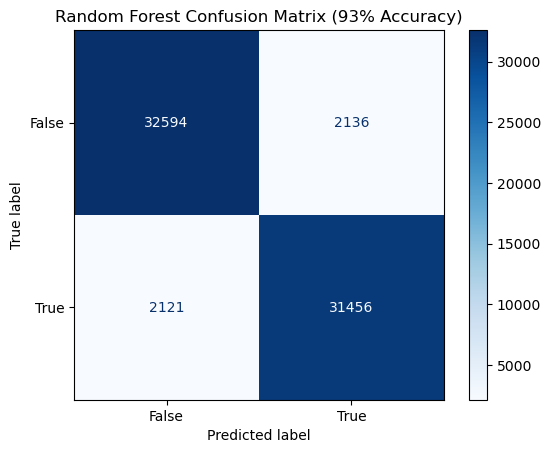

In [46]:
y_preds = rf_model.predict(P_test)
confusion_matrix(y_test, y_preds)

cm = confusion_matrix(y_test, y_preds, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot(cmap=plt.cm.Blues) 
disp.ax_.set_title("Random Forest Confusion Matrix (93% Accuracy)")
plt.savefig('RF_CM')
plt.show()

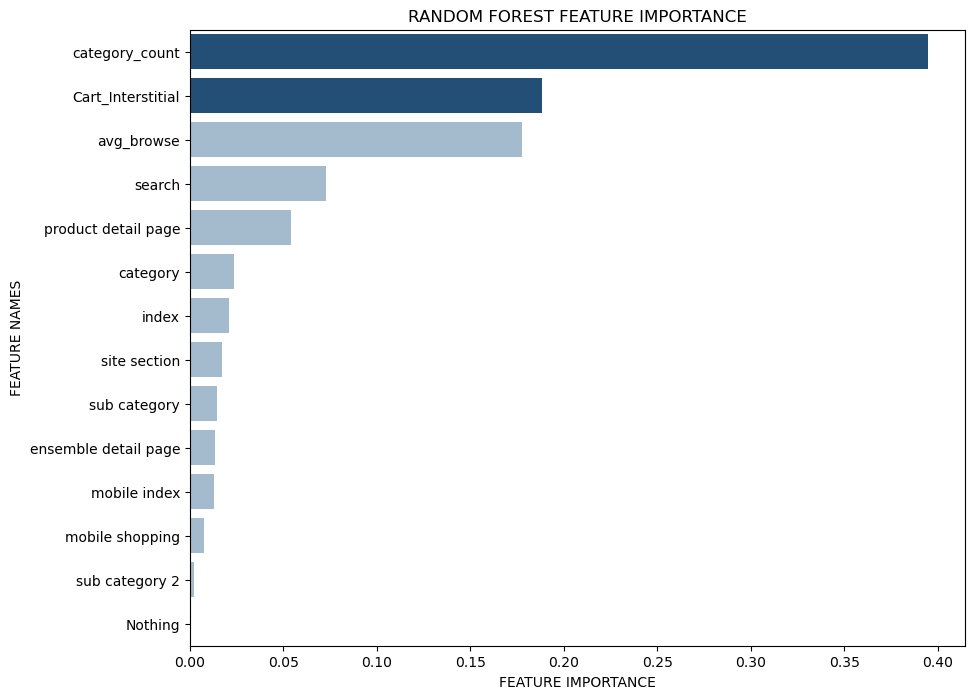

In [47]:
plot_feature_importance(rf_model.feature_importances_, P_train.columns, 'RANDOM FOREST')
plt.savefig('RF_FI')

In [48]:
%%time
xgb_model = XGBClassifier()
xgb_model.fit(P_train, y_train)
xgb_model.score(P_test, y_test)

CPU times: user 1min 11s, sys: 2.61 s, total: 1min 13s
Wall time: 6.34 s


0.9613509596381045

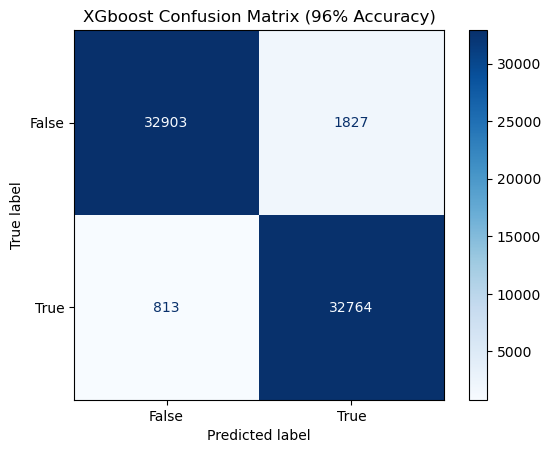

In [49]:
preds = xgb_model.predict(P_test)
confusion_matrix(y_test, preds)

cm = confusion_matrix(y_test, preds, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues) 
disp.ax_.set_title("XGboost Confusion Matrix (96% Accuracy)")
plt.savefig('XG_CM')
plt.show()

In [50]:
xgb_plt = list(xgb_model.get_booster().get_score(importance_type='weight').values())
xgb_plt

[12.0,
 265.0,
 275.0,
 219.0,
 254.0,
 198.0,
 258.0,
 264.0,
 218.0,
 209.0,
 174.0,
 74.0,
 1099.0,
 1658.0]

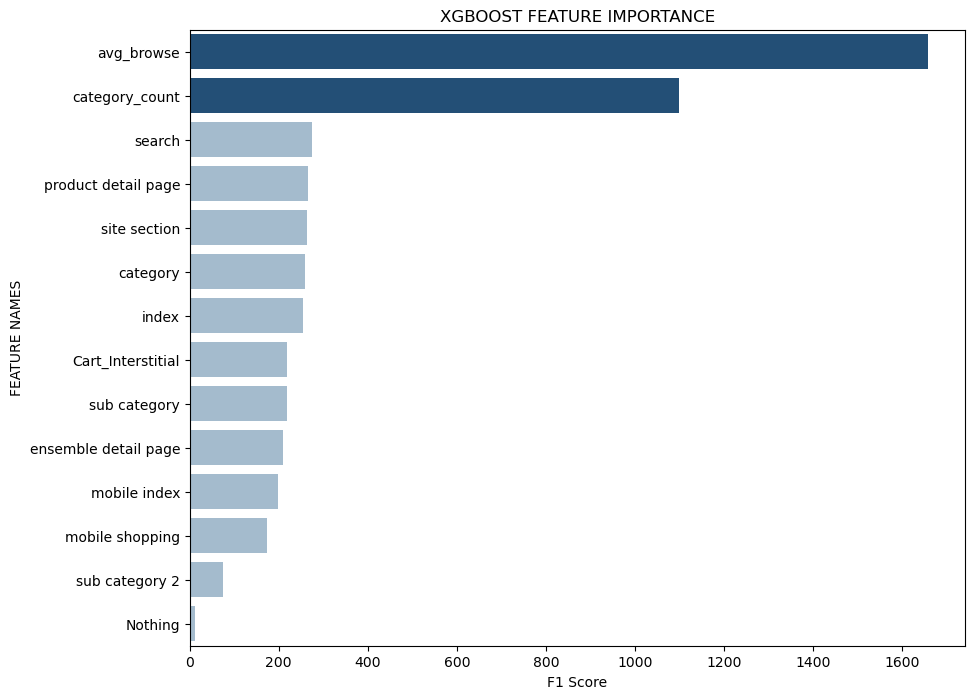

In [51]:
plot_feature_importance(xgb_plt, P_train.columns, model_type = 'XGBOOST')
plt.savefig('XG_FI')

In [52]:
%%time

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha = 0.01, hidden_layer_sizes=(16, 4), random_state = 42)
mlp.fit(P_train, y_train)
mlp.score(P_test, y_test)

CPU times: user 8min 51s, sys: 26.1 s, total: 9min 18s
Wall time: 46.8 s


0.9618779920066758

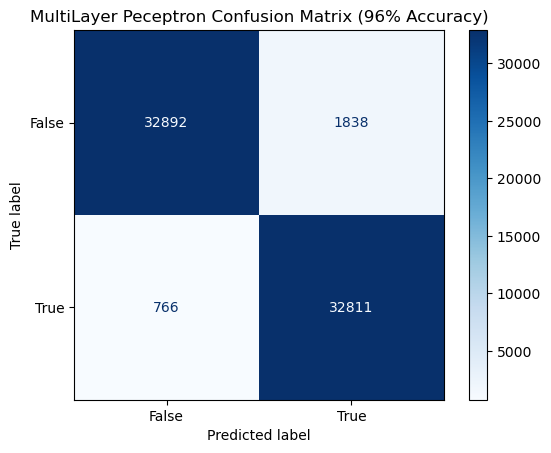

In [53]:
preds = mlp.predict(P_test)
confusion_matrix(y_test, preds)

cm = confusion_matrix(y_test, preds, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues) 
disp.ax_.set_title("MultiLayer Peceptron Confusion Matrix (96% Accuracy)")
plt.savefig('MLP_CM')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


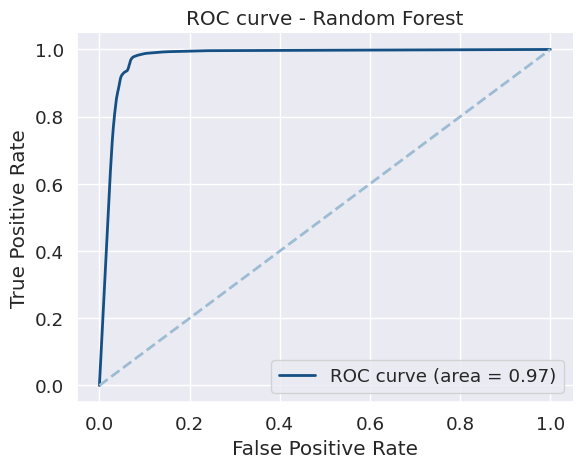

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# RF
probs = rf_model.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot ROC curve using seaborn
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(font_scale = 1.2)
sns.lineplot(fpr, tpr, color = '#155084', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
sns.lineplot([0, 1], [0, 1], color = '#9dbcd4', lw=2, linestyle='--')
sns.despine()
             
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


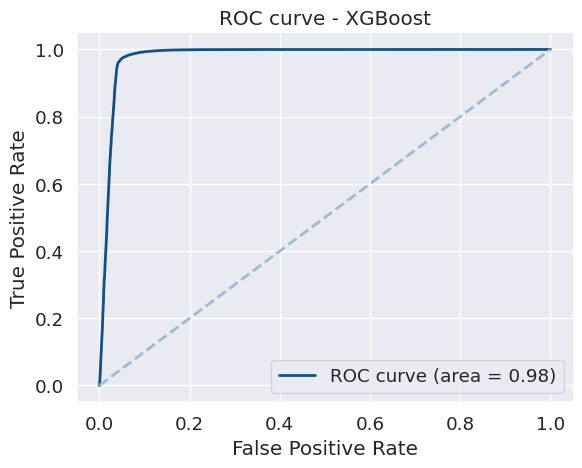

In [55]:
# XGBoost
probs = xgb_model.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot ROC curve using seaborn
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(font_scale = 1.2)
sns.lineplot(fpr, tpr, color = '#155084', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
sns.lineplot([0, 1], [0, 1], color = '#9dbcd4', lw=2, linestyle='--')
sns.despine()
             
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


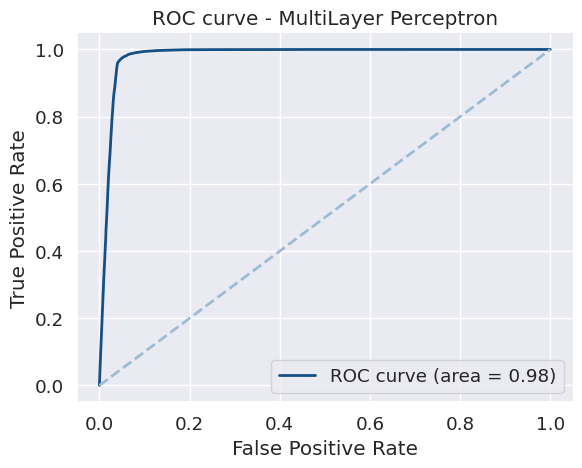

In [56]:
# MLP
probs = mlp.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot ROC curve using seaborn
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(font_scale = 1.2)
sns.lineplot(fpr, tpr, color = '#155084', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
sns.lineplot([0, 1], [0, 1], color = '#9dbcd4', lw=2, linestyle='--')
sns.despine()
             
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - MultiLayer Perceptron')
plt.legend(loc='lower right')
plt.show()

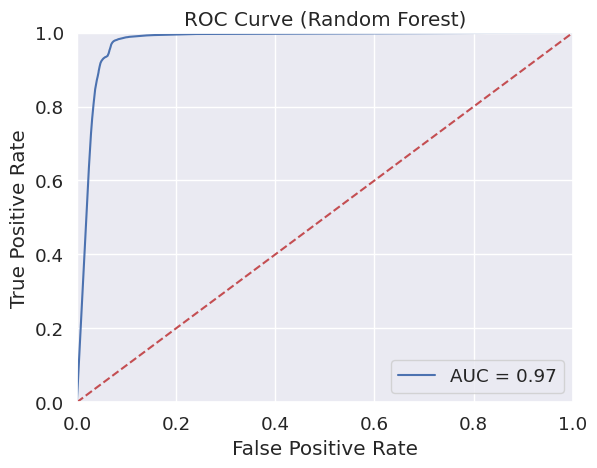

In [57]:
# ROC curve

# rf
probs = rf_model.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve (Random Forest)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

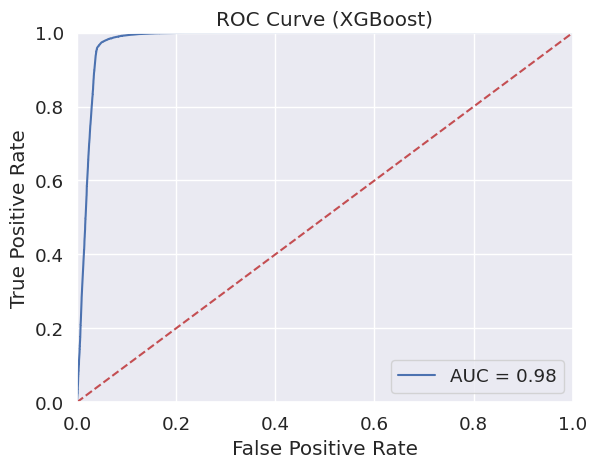

In [58]:
# xgb
probs = xgb_model.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve (XGBoost)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

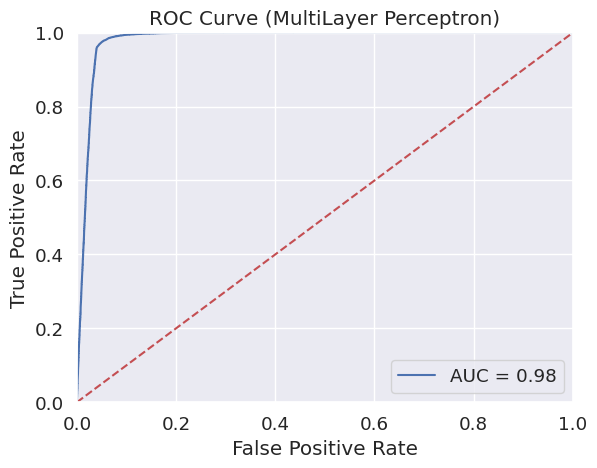

In [59]:
# mlp
probs = mlp.predict_proba(P_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve (MultiLayer Perceptron)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0, 0.5, 'Count')

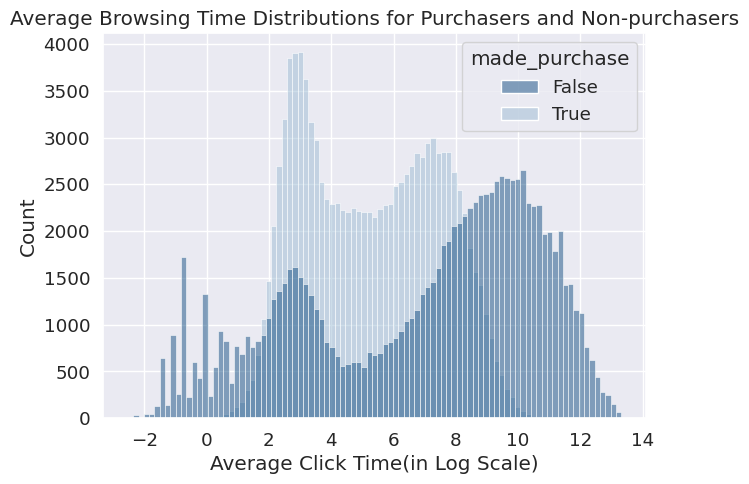

In [60]:
plot_df = pd.DataFrame({
    "avg_click_time":history_sample['avg_browse'],
    "made_purchase":history_sample['made_purchase']
})
plot_df = plot_df[plot_df['avg_click_time'] > -3]

# plot
import seaborn as sns

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=plot_df, ax=ax, stat="count", multiple="layer",
             x="avg_click_time", kde = False, hue = 'made_purchase',
             palette = ['#155084', '#9dbcd4'], element="bars", legend=True)
ax.set_title("Average Browsing Time Distributions for Purchasers and Non-purchasers")
ax.set_xlabel("Average Click Time(in Log Scale)")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

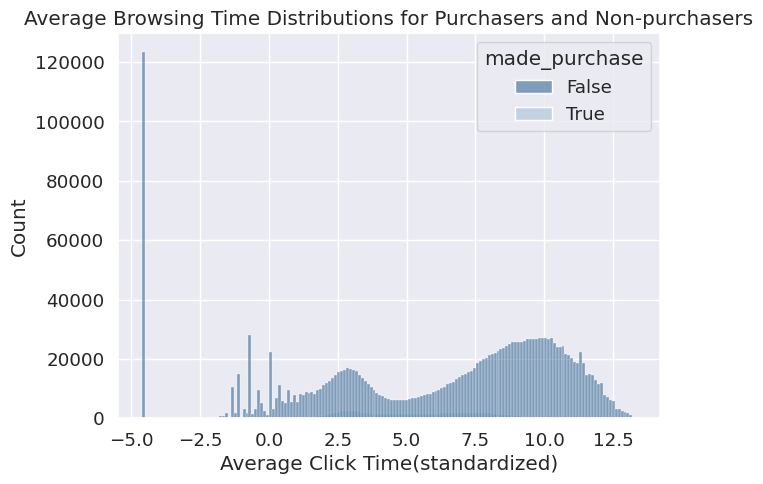

In [61]:
plot_df2 = pd.DataFrame({
    "avg_click_time":history_df['avg_browse'],
    "made_purchase":history_df['made_purchase']
})

# plot
import seaborn as sns

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=plot_df2, ax=ax, stat="count", multiple="layer",
             x="avg_click_time", kde = False, hue = 'made_purchase',
             palette = ['#155084', '#9dbcd4'], element="bars", legend=True)
ax.set_title("Average Browsing Time Distributions for Purchasers and Non-purchasers")
ax.set_xlabel("Average Click Time(standardized)")
ax.set_ylabel("Count")